In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

d = pd.read_csv('nursery_data.csv',
                names=["parents","has_nurs","form","children","housing","finance","social","health","class"])

In [2]:
d.head(5)

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64


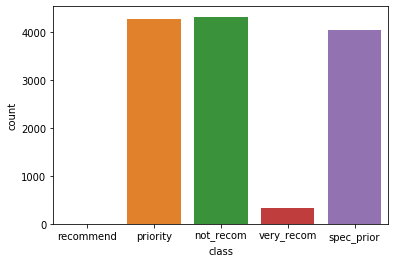

In [3]:
print(d['class'].value_counts())
sns.countplot(x='class', data=d)
plt.show()

not_recom     0.333385
priority      0.329217
spec_prior    0.312085
very_recom    0.025313
Name: class, dtype: float64


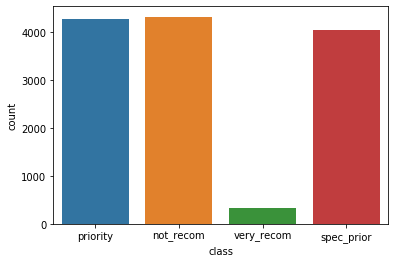

In [4]:
indexNames = d[ d['class'] == 'recommend' ].index
d.drop(indexNames , inplace=True)

print(d['class'].value_counts(normalize=True))
sns.countplot(x='class', data=d)
plt.show()

In [5]:
d.head(5)

,parents,has_nurs,form,children,housing,finance,social,health,class
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority


In [6]:
features = ["children","housing","class","has_nurs","social","finance","parents"]
for column in features:
    d[column] = d[column].astype("category").cat.codes
d.head(5)

,parents,has_nurs,form,children,housing,finance,social,health,class
1,2,3,complete,0,0,0,0,priority,1
2,2,3,complete,0,0,0,0,not_recom,0
4,2,3,complete,0,0,0,2,priority,1
5,2,3,complete,0,0,0,2,not_recom,0
6,2,3,complete,0,0,0,1,recommended,1


In [7]:
features1 = ['form','health']
x1 = d.drop(features1, axis = 1)
x1.head(5)

,parents,has_nurs,children,housing,finance,social,class
1,2,3,0,0,0,0,1
2,2,3,0,0,0,0,0
4,2,3,0,0,0,2,1
5,2,3,0,0,0,2,0
6,2,3,0,0,0,1,1


In [8]:
x2 = d.drop(features, axis = 1)

x2 = pd.get_dummies(x2)
x2.head(5)

,form_complete,form_completed,form_foster,form_incomplete,health_not_recom,health_priority,health_recommended
1,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0
4,1,0,0,0,0,1,0
5,1,0,0,0,1,0,0
6,1,0,0,0,0,0,1


In [9]:
x = pd.concat([x1, x2], axis = 1)
x.head(5)

,parents,has_nurs,children,housing,finance,social,class,form_complete,form_completed,form_foster,form_incomplete,health_not_recom,health_priority,health_recommended
1,2,3,0,0,0,0,1,1,0,0,0,0,1,0
2,2,3,0,0,0,0,0,1,0,0,0,1,0,0
4,2,3,0,0,0,2,1,1,0,0,0,0,1,0
5,2,3,0,0,0,2,0,1,0,0,0,1,0,0
6,2,3,0,0,0,1,1,1,0,0,0,0,0,1


In [10]:
x.head()
x.to_csv('nursery_processed.csv')